# Gawron Comments

This looks fine.  I made some changes in a few places but all of these are in order to
test on a small data set I had.  None of them are corrections.

                                Snetiment Analysis of Amazon Food Reviews

Amazon Food review dataset is an open source dataset avaliable on Standford Network with 568420 reviews on food products. 
The dataset is avaliable in csv format. It has the information about the ratings for each product and the helpfulness parameters.

In [11]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

In [3]:
#Reading a csv file into dataframe

df = pd.read_csv("train_neg_pos.csv")

In [5]:
df.columns

Index([u'sentiment', u'review'], dtype='object')

In [6]:
#Viewing the results for first few records

#df[['Score', 'Summary']].head()
df[['sentiment', 'review']].head()

,sentiment,review
0,neg,Good tea/cheap chest: The tea assortment in t...
1,pos,Good program with nice graphics: I was able t...
2,neg,bloody awful: sounds like a third world eleme...
3,pos,An interesting toy: I saw this toy in Delhi b...
4,pos,The best album I've ever heard: I can't under...


In [7]:
#Calculating the total number of records in the dataset
# JMG I have changed the size of the training set to be much smaller JUST for code testing.
nrows = len(df.index)
nrows

20000

In [56]:
#Classifying the reviews as positive or negative bassed on the ratings provided by the users, Also calculating the usefulness
#score bassed on the helppfulness parameters  

df["Sentiment"] = df["Score"].apply(lambda score: "positive" if score > 3 else "negative")
df["Usefulness"] = (df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]).apply(lambda n: "1" if n > 0.8 else "0")

In [8]:
#Viewing the first few sentiments
#
df['sentiment'].head(5)

0    neg
1    pos
2    neg
3    pos
4    pos
Name: sentiment, dtype: object

#JMG testing code with new attribites

In [9]:
df[df.sentiment == 'neg'].tail(5)

,sentiment,review
19993,neg,Teen Titan Tick-off: I got this for my son be...
19994,neg,Do not buy this Brand!!!: I was originally pl...
19995,neg,Stargate: Continuum: I didn't recieve the DVD...
19996,neg,Shakespeare: As we all have one time or anoth...
19998,neg,Very dissapointing: I've just received it as ...


In [8]:
df[df.Score == 1].head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Usefulness
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,useless
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,negative,useful
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",negative,useless
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,DO not like it,"This oatmeal is not good. Its mushy, soft, I D...",negative,useless
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,negative,useful
73,74,B0059WXJKM,A25VFHVGI4CFTP,Diana Robinson,0,1,1,1335744000,Warning! WARNING! -ALCOHOL SUGARS!,Buyer Beware Please! This sweetener is not for...,negative,useless
75,76,B001EPPI84,A27TZ4WBU7N0YF,I. So,0,0,1,1275004800,No Tea Flavor,No tea flavor at all. Just whole brunch of art...,negative,useless
99,100,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,negative,useless
153,154,B002HQAXUW,A17ESTP5T7T1PH,Bumbeda1,1,1,1,1324944000,Rip off Price,These singles sell for $2.50 - $3.36 at the st...,negative,useful
164,165,B000ITVLE2,ARTBQH9WOZTIV,"Billy Wilson ""amzrview""",0,4,1,1269216000,Tasteless but low calorie,Seriously this product was as tasteless as the...,negative,useless


JMG Had to edit the next cell to work, correct import in following cell

In [14]:
from sklearn.feature_extraction import text 
tf = text.TfidfVectorizer()
X = tf.fit_transform(df['review'])
print(X)

  (0, 17723)	0.06020801232
  (0, 39758)	0.330479754368
  (0, 7515)	0.121253402513
  (0, 7614)	0.542098205725
  (0, 40151)	0.133955632426
  (0, 3471)	0.212534867157
  (0, 20462)	0.0390444890953
  (0, 21575)	0.0682848543586
  (0, 14666)	0.0994300574214
  (0, 43172)	0.229229828746
  (0, 39705)	0.193003014196
  (0, 19783)	0.0954826974339
  (0, 43148)	0.060468401216
  (0, 30515)	0.132062164526
  (0, 31842)	0.0931489207158
  (0, 40799)	0.112601465939
  (0, 2989)	0.245924790336
  (0, 24905)	0.124841819521
  (0, 12467)	0.0848908933031
  (0, 27474)	0.0903599967838
  (0, 23631)	0.115635122699
  (0, 42642)	0.0676753799055
  (0, 2572)	0.0290495835644
  (0, 40246)	0.0680087262145
  (0, 3129)	0.053085516426
  :	:
  (19999, 40151)	0.0520051803671
  (19999, 28050)	0.0920679681125
  (19999, 44433)	0.0906778510834
  (19999, 27883)	0.128630211948
  (19999, 21637)	0.0628708497696
  (19999, 28231)	0.124155827815
  (19999, 17332)	0.132729009881
  (19999, 45055)	0.18859040894
  (19999, 43785)	0.199771562195


In [16]:
#Cleaning the summary, removing the punctuations

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    return sentence

df['Summary_Clean'] = df['review'].apply(cleanup)

train, test = train_test_split(df, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

16000 items in training data, 4000 in test data


In [17]:
#Creating test and train vectors

count_vect = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = count_vect.fit_transform(train["Summary_Clean"])

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["sentiment"]
y_test = test["sentiment"]

In [18]:
prediction1 = dict()

In [19]:
#Applying Multinomial Naive Bayes learning method

from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB().fit(X_train_tfidf, y_train)
prediction1['Multinomial'] = model_mnb.predict(X_test_tfidf)



In [20]:
#Applying Bernoulli Naive Bayes learning method

from sklearn.naive_bayes import BernoulliNB
model_bnb = BernoulliNB().fit(X_train_tfidf, y_train)
prediction1['Bernoulli'] = model_bnb.predict(X_test_tfidf)


JMG: Far and away the slowest

In [21]:
#Applying Logistic Regression method

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction1['Logistic'] = logreg.predict(X_test_tfidf)

In [22]:
#Applying Support vector machine method

from sklearn.svm import LinearSVC, SVC
svm_total = 0

svm = LinearSVC(C=1e5)
model_svm = svm.fit(X_train_tfidf, y_train)
prediction1['svm'] = model_svm.predict(X_test_tfidf)

svm_score = svm.score(X_test_tfidf, y_test)
svm_total +=svm_score

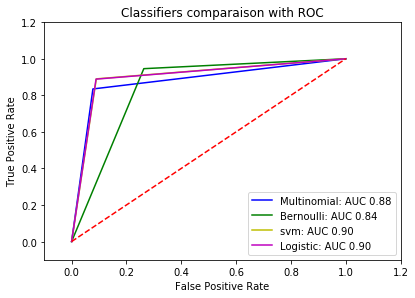

In [24]:
#ROC Curve

# JMG edited
def formatt(x):
    if x == 'neg':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction1.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [110]:
print(metrics.classification_report(y_test, prediction['svm'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.87      0.82      0.84     24691
   negative       0.95      0.97      0.96     88993

avg / total       0.93      0.93      0.93    113684



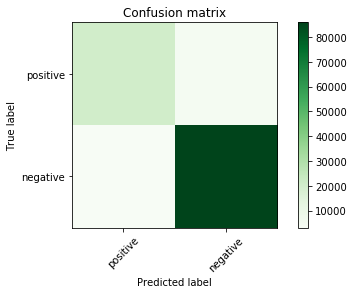

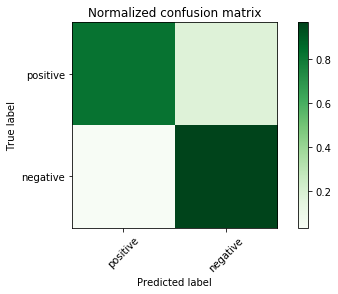

In [111]:
#Confusion Matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greens, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['svm'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

In [113]:
#Calculating the features for logistic regression

words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logreg_result.coef_[0])),
    columns = ['feature', 'coefficient'])

feature_coefs.sort_values(by='coefficient').head(5)

,feature,coefficient
1054535,worst,-29.323069
637077,not,-24.461263
1071954,yuck,-20.209363
895610,terrible,-19.709577
456478,horrible,-19.560111


In [114]:
#Calculating the features for support vector machine

words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, model_svm.coef_[0])),
    columns = ['feature', 'coefficient'])

feature_coefs.sort_values(by='coefficient').head(5)

,feature,coefficient
644908,not like the packaging,-11.783680
949677,this product but do,-9.825702
881415,tastes really good but,-9.314004
137703,but not as advertised,-9.108492
142184,but the price has,-8.953503


In [105]:
# Test the model on the test data.

def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sentence Classified as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))

test_sample(logreg, "The food was delicious, it smelled great and the taste was awesome")
test_sample(logreg, "The whole experience was horrible. The smell was so bad that it literally made me sick.")
test_sample(logreg, "The food was ok, I guess. The smell wasn't very good, but the taste was ok.")

Sentence Classified as POSITIVE: negative prob 0.031836, positive prob 0.968164
Sentence Classified as NEGATIVE: negative prob 0.999766, positive prob 0.000234
Sentence Classified as NEGATIVE: negative prob 0.876407, positive prob 0.123593


I was facing an error for calculating the class probabilities for SVM so i calculated them for Logistic regression as the 
accuracy of logistic regression and SVM is similar.

From above observations we can clearly understand that Logistic regression performed much better in classifying the reviews 
than Bernoulli's classifier. 
The variability explained by SVM is 88% whereas that explained by Bernnoulli is 70%. 
The variability explained by Logistic Regression is 88% whereas that explained by Bernnoulli is 70%. 

Also,as per the logistic regression result the comment "The food was delicious, it smelled great and the taste was awesome"
was correctly classified as a positive review. 

Thus the accuracy of SVM for the provided list of comments was 100%.